# Personal Information
Name: **Naomi Rood**

StudentID: **12666866**

Email: [**naomi.rood@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **17-03-2022**

# Data Context
**The data that will be used in the thesis and therfore in this explotaroty data analysis is from the NOS (Dutch public broadcast organisation). Two different datasets are used. The first one contains information about the  news articles and the second dataset has information about the articles that are recommended by an article, these are the links between articles.**

## Data Description

The thesis will focus on predicting links between articles (recommended items) by using the SEAL framework. This framework learn from subgraphs, node embeddings and node attributes. The node embeddings will be made using CANE, this is a method that learns from graph structres and the text. In this case the text from the news articles. The node attributes can be any kind of side information about the articles.

This Exploratory Data Analysis focuses on analysing the different variables of the articles and the links. Some variables can be an attribute of the nodes in the SEAL framework. For example, the owner of the articles. 92.1% of the linked articles have the same owner. Also the system tag can be an attribrute if the articles have it. In 90.3% of the cases where both articles have a system tag, they have the same system tag. Another variable is the subcategory. This can be an attribute in the SEAl framework, the difficult aspect is that some articles only have one subcategory while others have four. 

An interesting point is the time difference between linked articles. A recommended item can be published a couple hours ago but there are also recommended items that are published more than 1 month back. Another variable is keywords, these are difficult to work with. This are words related to an article. Every article has a different amount of keywords and there are even some articles without keywords. Also a lot of unique keywords exists, this means that only one article has that specific keyword. Furthermore,the same word can be written in a different way, which happens a lot in terms of the keywords. For example 'vs' and 'verenigde-staten'. 

These are the main findings in the data, to get a more detailed understanding, it is possible to look at the following plots and information.

#### Github link

https://github.com/Naomirood/Thesis

In [1]:
# Imports
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import itertools
import math 
from collections import Counter
from operator import itemgetter

In [2]:
# Loading the data
articles = pd.read_csv('../item_data.csv')
links = pd.read_csv('../internal_links.csv')

# The videos are removed,because videos don't have any text and don't have any recommendations.
# Furthermore, only articles that are online can be recommended, offline articles will not be used.
articles = articles[articles.type=='article']
articles = articles[articles.online_1==True]

# Only 'bekijk_ook' items will be used, internal_links (like citations) will not be recommended for this thesis
links = links[links.relation_type == 'bekijk_ook']

# links with only both articles online will be used
articles_id = list(articles.id)
links = links[links.parent_item.isin(articles_id)]
links = links[links.child_item.isin(articles_id)]

In [3]:
# This shows a snippet of the article data
articles.head()

,id,title,description,text,published_at,modified_at,online,type,online_1,owner,sub_category_list,system_tag,keywords
1,2141129,"'Trump is net een kind, hij is relaxter dan Hi...","'Trump is net een kind, hij is relaxter dan Hi...",Joris sprak in Amerika met kinderen over de ve...,2016-11-03 09:08:13 UTC,2018-04-02 17:11:41 UTC,True,article,True,jeugd,buitenland,NaN,amerika--verkiezingen-1
3,2172430,Middelbare scholieren beginnen met eindexamens,Middelbare scholieren beginnen met eindexamens,Twee spannende weken voor middelbare scholiere...,2017-05-10 11:28:25 UTC,2017-11-15 17:29:23 UTC,True,article,True,jeugd,binnenland,NaN,eindexamen--middelbare--periode--school-30
4,2361070,Datum voor eerste Nederlandse corona-vaccinati...,Datum voor eerste Nederlandse corona-vaccinati...,Op 8 januari kunnen in Nederland de eerste cor...,2020-12-17 17:40:07 UTC,2020-12-17 17:40:07 UTC,True,article,True,jeugd,binnenland,NaN,vaccin-1--vaccinatie-1--inenting--corona-1
5,357260,Politie in actie tegen bangalijst,'Slettenlijst' veel in het nieuws.,Het is deze week veel in het nieuws geweest; d...,2012-03-31 07:16:00 UTC,2012-03-31 15:26:27 UTC,True,article,True,jeugd,NaN,NaN,internet--bangalijst--sletten--politie-1--seks-1
6,2449583,Verstappen wint grand prix van de Verenigde St...,Verstappen wint grand prix van de Verenigde St...,Max Verstappen heeft de grand prix van de Vere...,2022-10-24 06:09:35 UTC,2022-10-24 06:09:35 UTC,True,article,True,jeugd,buitenland,NaN,grand-prix--verenigde-staten--max-verstappen


In [4]:
# This shows a snippet of the links data
links.head()

,parent_item,child_item,relation_type
10940,2000096,2000028,bekijk_ook
10941,2000122,2000124,bekijk_ook
10942,2000152,2000133,bekijk_ook
10943,2000124,2000122,bekijk_ook
10944,2000162,2000132,bekijk_ook


### Analysis links: 

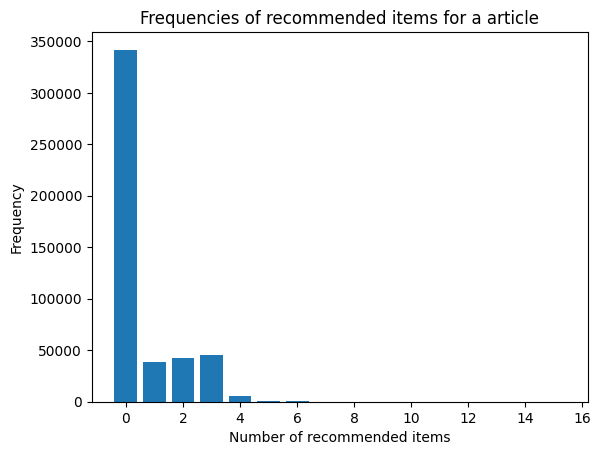

In [5]:
# show the distribution of the number of links a parent items has
df= links.groupby('parent_item').count().child_item.to_frame()

# put all id's that don't have a link also in the links and set to 0 links
df = df.merge(articles, left_index=True, right_on='id', how='right').child_item.fillna(0)
rec = df.value_counts()
plt.bar(rec.index, rec.values)
plt.xlabel('Number of recommended items')
plt.ylabel('Frequency')
plt.title('Frequencies of recommended items for a article')
plt.show()

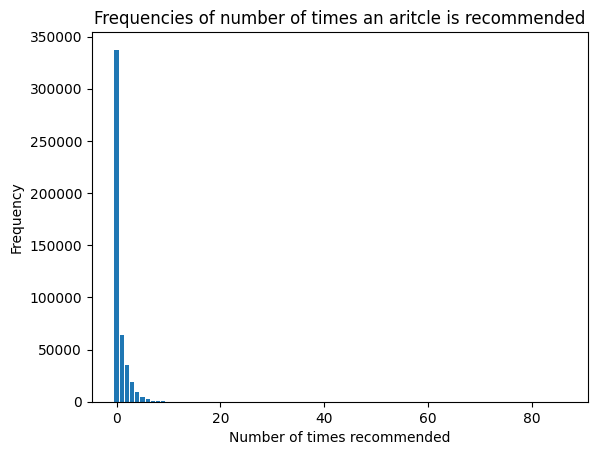

In [6]:
df2= links.groupby('child_item').count().parent_item.to_frame()

# put all id's that don't are recommended also in the links and set to 0 links
df2 = df2.merge(articles, left_index=True, right_on='id', how='right').parent_item.fillna(0)
rec = df2.value_counts()
plt.bar(rec.index, rec.values)
plt.xlabel('Number of times recommended')
plt.ylabel('Frequency')
plt.title('Frequencies of number of times an aritcle is recommended')
plt.show()

The first plot shows that most of the articles have no recommendations. But the articles that show recommendations usually have 1, 2 or 3 recommendations. The second plot shows how often an articles is recommended by another article. Most articles are never recommended. Some articles arerecommended 1 to 5 times but even some articles are recommended more then 40 times. 

### Analysis freqency owner and system-tags:

The number of articles without a system tag is: 450330 , this is 94.95 % van de artikelen


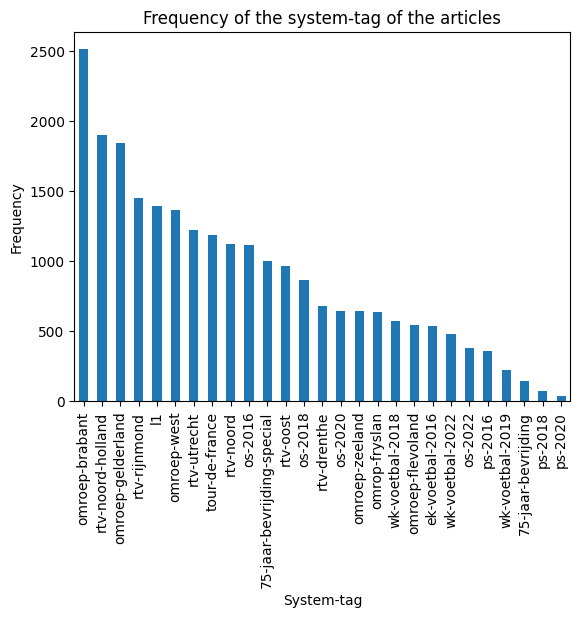

In [7]:
# This plot shows the mumber articles with a system tag
per = (articles.system_tag.isnull().sum()/len(articles)*100)
print('The number of articles without a system tag is:', articles.system_tag.isnull().sum(), ', this is', round(per,2) ,'% van de artikelen')
articles.system_tag.value_counts().plot.bar()

plt.xlabel('System-tag')
plt.ylabel('Frequency')
plt.title('Frequency of the system-tag of the articles')
plt.show()

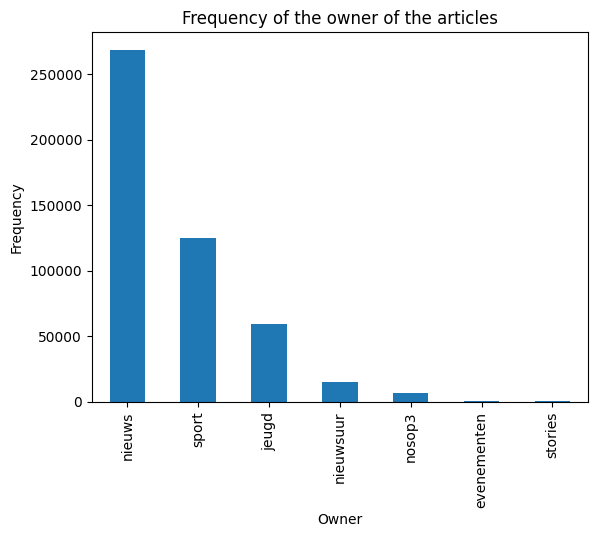

In [8]:
articles.owner.value_counts().plot.bar()
plt.xlabel('Owner')
plt.ylabel('Frequency')
plt.title('Frequency of the owner of the articles')
plt.show()

Most of the articles doesn't have a system tag. 'Omroep-Brabant' is the most common system tag. Also the frequency of the differnt owners is plotted. This shows clearly that 'nieuws' is the owner of most articles.

### Analysis published time:

In [9]:
# convert the plublished_at and modified_at to datetime objects to work with
def convert_to_datetime(date_string):
    return datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S %Z')

# apply the function to the column using the apply() method
articles.published_at = articles.published_at.apply(convert_to_datetime)
articles.modified_at = articles.modified_at.apply(convert_to_datetime)

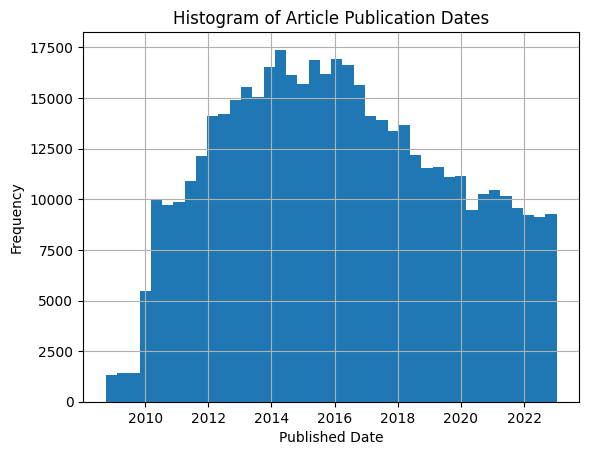

In [10]:
# show the distribution of when articles are published
articles.published_at.hist(bins=40)
plt.xlabel('Published Date')
plt.ylabel('Frequency')
plt.title('Histogram of Article Publication Dates')
plt.show()

Most articles are published between 2012 and 2016, from then, there was a little decrease in the published artcles. In the following plot is the time difference in hours between a parent item and child item shown. (parent published time minus child published time). Most of the differences are positive, which means that that child item was published earlier than the parent item, which makes sense because the child item is usually written before the parent item is written. But in a couple links, the child item was published earlier than the parent item, this is usally not more than 1 day back. 

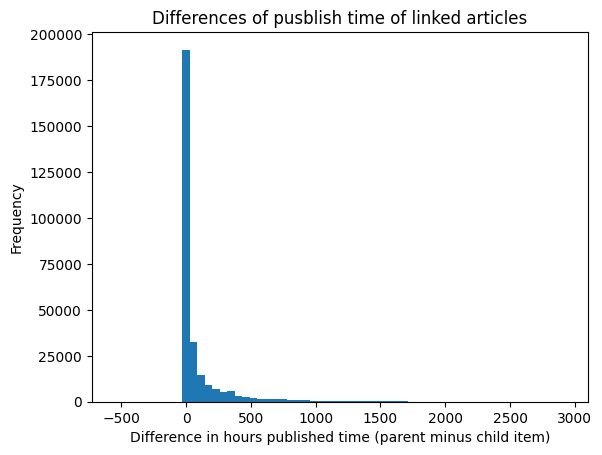

In [11]:
# add the publish times to the links dataframe and calculate the difference
links_time = links.merge(articles, left_on = 'parent_item', right_on='id', how='left')[['parent_item', 'child_item', 'published_at']].rename(columns={'published_at': 'published_at_parent'})
links_time = links_time.merge(articles, left_on = 'child_item', right_on='id', how='left')[['parent_item', 'child_item', 'published_at', 'published_at_parent']].rename(columns={'published_at': 'published_at_child'})
links_time['diff'] = links_time.published_at_parent - links_time.published_at_child 

# plot of time between publishing of the two articles
(links_time['diff'].astype('timedelta64[h]')/24).plot.hist(bins=60)
plt.xlabel('Difference in hours published time (parent minus child item)')
plt.ylabel('Frequency')
plt.title('Differences of pusblish time of linked articles')
plt.show()

### Analysis similarity links:


92.1% of the linked articles have the same owner. Only 3.8% of the linked items have the smae system tag. This could be because a lot of articles don't have a system tag. If only the links are filtered where both articles do have a system tag, 90.3% of the linked articles have the same system tag. 

In [12]:
sim = links.merge(articles, left_on = 'parent_item', right_on='id', how='left')[['parent_item', 'child_item', 'owner']].rename(columns={'owner': 'owner_parent'})
sim = sim.merge(articles, left_on = 'child_item', right_on='id', how='left')[['parent_item', 'child_item', 'owner_parent', 'owner']].rename(columns={'owner': 'owner_child'})
percentage = (len(sim[sim.owner_parent == sim.owner_child])/len(sim))*100
print(round(percentage,1), '% of the linked items have the same owner')

92.1 % of the linked items have the same owner


In [13]:
sim = links.merge(articles, left_on = 'parent_item', right_on='id', how='left')[['parent_item', 'child_item', 'system_tag']].rename(columns={'system_tag': 'system_tag_parent'})
sim = sim.merge(articles, left_on = 'child_item', right_on='id', how='left')[['parent_item', 'child_item', 'system_tag_parent', 'system_tag']].rename(columns={'system_tag': 'system_tag_child'})
percentage = (len(sim[sim.system_tag_parent == sim.system_tag_child])/len(sim))*100
print(round(percentage,1), '% of the linked items have the same system tag')

3.8 % of the linked items have the same system tag


In [14]:
# check for links where both articles have a system tag if they have the same system tag
sim = sim.dropna()
sim = sim.merge(articles, left_on = 'parent_item', right_on='id', how='left')[['parent_item', 'child_item', 'system_tag']].rename(columns={'system_tag': 'system_tag_parent'})
sim = sim.merge(articles, left_on = 'child_item', right_on='id', how='left')[['parent_item', 'child_item', 'system_tag_parent', 'system_tag']].rename(columns={'system_tag': 'system_tag_child'})
percentage = (len(sim[sim.system_tag_parent == sim.system_tag_child])/len(sim))*100
print(round(percentage,1), '% of the linked items have the same system tag')

90.3 % of the linked items have the same system tag


### Analysis text length

In [15]:
# split all the words in a article text by whitespace and put them in a  list
articles_text = articles.text.str.split(" ")

#calculate the number of words for each article
articles_text1 = articles_text.str.len()

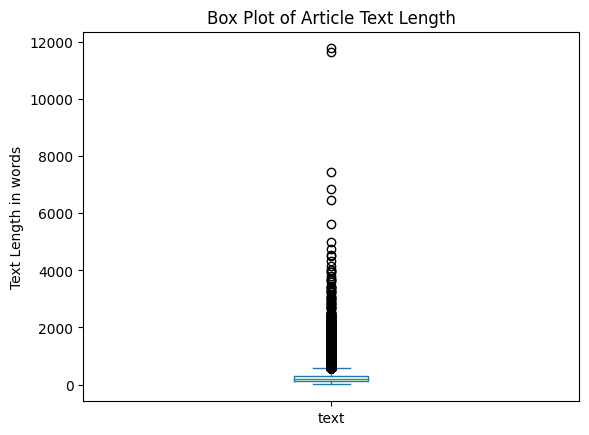

In [16]:
#  plot a boxplot to show the distribution of the text lengths
boxplot = articles_text1.plot.box()
plt.title('Box Plot of Article Text Length')
plt.ylabel('Text Length in words')
plt.show()

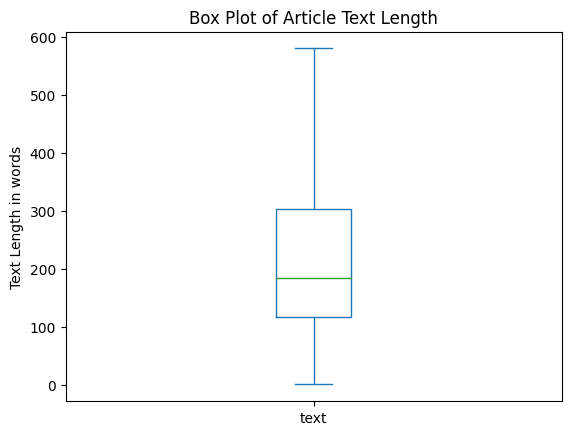

In [17]:
# plot a boxplot of the distribution of text length without outliers
boxplot2 = articles_text1.plot.box(showfliers=False)
plt.title('Box Plot of Article Text Length')
plt.ylabel('Text Length in words')
plt.show()

The first  boxplot shows that there are a lot of outliers with respect to the distribution of the text lengths of the articles. Even two articles have around 120000 words. To get a better understanding of the distribution, the boxplot is also plotted without the outliers. This shows that the de median text length is 184 words with a maximum of having 580 words (without the outliers). 

### Analysis Sub category list

In [18]:
# calculate which  percentage of articles doesn't have a subcategory
per = (sum(articles.sub_category_list.isna())/len(articles))*100
print(round(per,1),'% of the articles does not fall under a sub category')

10.1 % of the articles does not fall under a sub category


In [19]:
# get for each article the distinct subcategories and flatten this list
articles_cat = articles.sub_category_list.str.replace("--", ' ').str.split()
articles_cat  = list(articles_cat)
flat_lst = [elem for sublist in articles_cat if isinstance(sublist, list) for elem in sublist if not pd.isna(elem)]


There are 109 different subcategories, but some categories occur a lot more than others. 10.1% of the articles doesn't have a subcategory and also a lot of articles have more than one subcategory. The following plots show which of the subcatagories are popular and which aren't. For example: 'binnenland', 'buitenland' and 'voetbal' have high frequencies. While 'rolstoelschermen' is a subcategory for only 1 article.

Text(0, 0.5, 'Frequency')

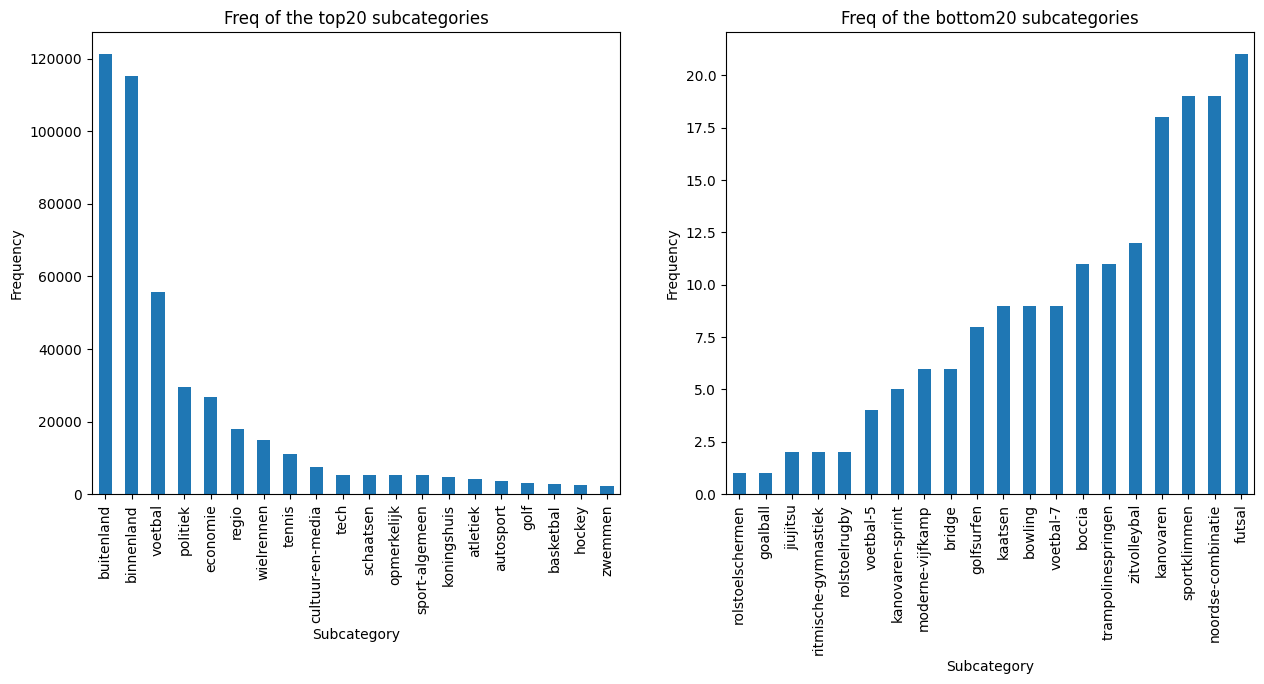

In [20]:
# count subcategories of 20 most and 20 least occurring subcategories
count  = Counter(flat_lst)
count_large = dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:20])
count_small = dict(sorted(count.items(), key = itemgetter(1), reverse = False)[:20])
df_count_large =  pd.DataFrame.from_dict(count_large, orient ='index')
df_count_small =  pd.DataFrame.from_dict(count_small, orient ='index')

# plot the 2 different dataframes with the most and least occurring subcategories
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
df_count_large.plot(kind='bar', ax=ax,legend=False, title = 'Freq of the top20 subcategories')
df_count_small.plot(kind='bar', ax=ax2, legend=False, title = 'Freq of the bottom20 subcategories')
ax.set_xlabel("Subcategory")
ax.set_ylabel("Frequency")
ax2.set_xlabel("Subcategory")
ax2.set_ylabel("Frequency")

### Analysis title

In [21]:
# split all the words in a article title by whitespace and put them in a list
articles_title = articles.title.str.split(" ")

#calculate the number of words for each article title
articles_title= articles_title.str.len()

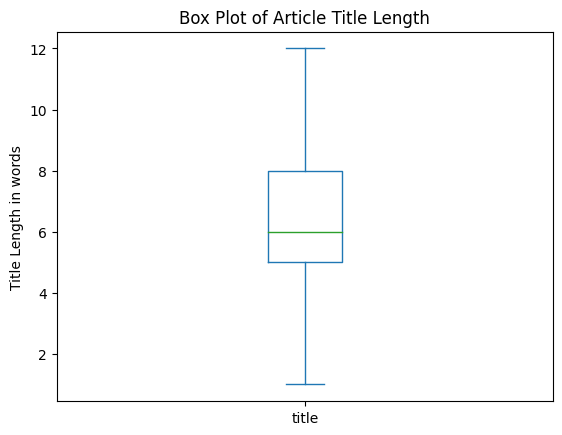

In [22]:
# plot a boxplot to show the distribution of the title lengths
boxplot = articles_title.plot.box(showfliers=False)
plt.title('Box Plot of Article Title Length')
plt.ylabel('Title Length in words')
plt.show()

The boxplot above shows the distribution of the title length. With the meidan of six words.

### Analysis keywords

In [23]:
# clean the keywords and count the number of keywords
articles_set = articles
articles_set['keywords2'] = articles_set['keywords'].str.replace("--", ' ')
articles_set['keywords2'] = articles_set['keywords2'].str.replace("-\d+", '')
articles_set['keywords2'] = articles_set['keywords2'].str.split(' ')
articles_set.len = articles_set['keywords2'].str.len()

/Users/naomirood/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/Users/naomirood/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


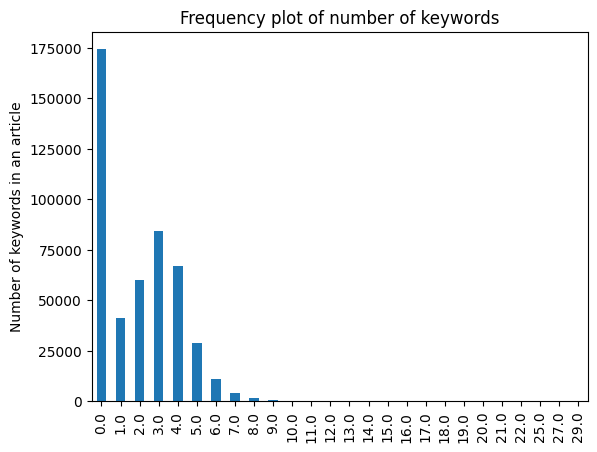

In [24]:
boxplot = articles_set.len.fillna(0).value_counts().sort_index().plot.bar()
plt.title('Frequency plot of number of keywords')
plt.ylabel('Number of keywords in an article')
plt.show()

In [25]:
# select all keywords of all articles
keywords = list(articles_set['keywords2'])
all_keywords = [elem for sublist in keywords if isinstance(sublist, list) for elem in sublist if not elem == '']

Text(0, 0.5, 'Frequency')

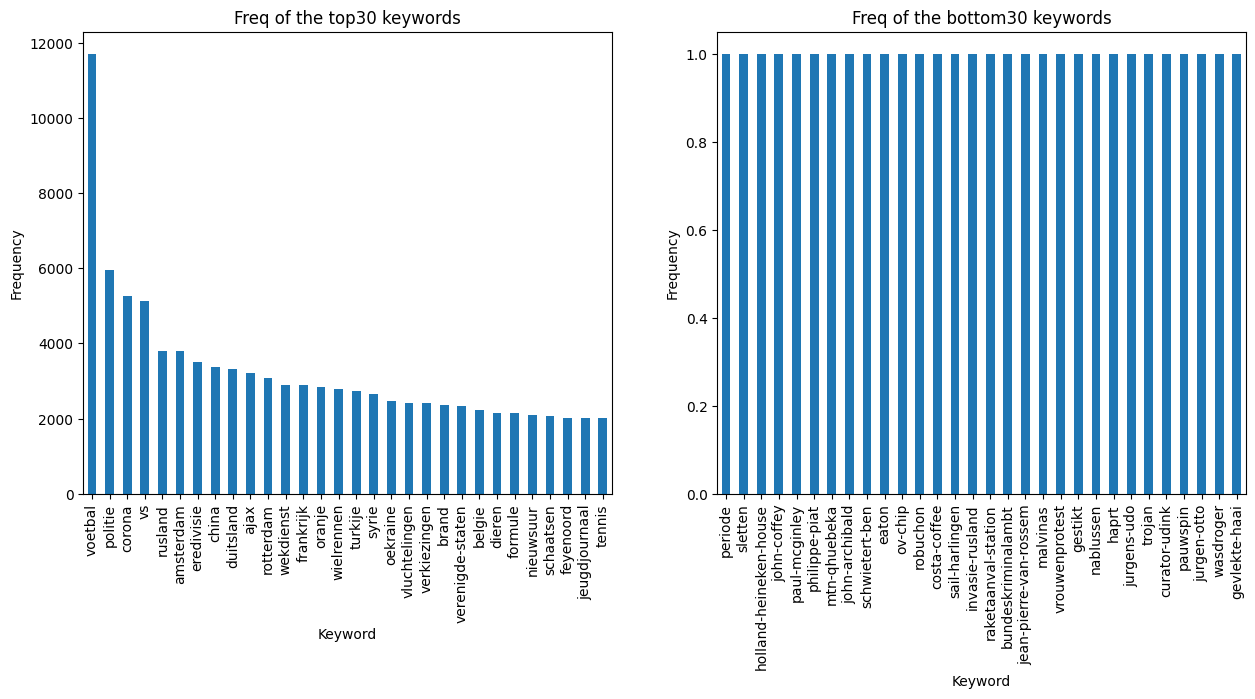

In [26]:
# count the keywords
count  = Counter(all_keywords)
count1 = [x for x in count.values() if x ==1]
count_large = dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:30])
count_small = dict(sorted(count.items(), key = itemgetter(1), reverse = False)[:30])
df_count_large =  pd.DataFrame.from_dict(count_large, orient ='index')
df_count_small =  pd.DataFrame.from_dict(count_small, orient ='index')

# plot the 2 different dataframes with the most and least occurring keywords
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
df_count_large.plot(kind='bar', ax=ax,legend=False, title = 'Freq of the top30 keywords')
df_count_small.plot(kind='bar', ax=ax2, legend=False, title = 'Freq of the bottom30 keywords')
ax.set_xlabel("Keyword")
ax.set_ylabel("Frequency")
ax2.set_xlabel("Keyword")
ax2.set_ylabel("Frequency")

The first plot shows the number of keywords that is assigned to an article. Most articles have 2-4 keywords if they have keywords, but still a lot of articles doesn't contain any. Out of all keywords, there are 108895 unique keywords. The second plot shows the frequecies of the top and bottom 30 words. The right plot shows only 30 words that are mentiond once, however there are 61741 uique keywords that are mentioned once. As possible to see in the right plot, these words are very specific like 'costa-coffee' while the top words are more general like 'politie'. What is interesting is that the US is twice in the top30 but written in two different ways: 'vs' and 'verenigde staten'. 'Voetbal' is assigned as keyword for over 100000 articles and is the most assigned keyword.